<a href="https://colab.research.google.com/github/SamaherHaji/Predicting-Hazardous-Near-Earth-Objects-NEOs-/blob/main/Predicting_Hazardous_Near_Earth_Objects_NEOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#dataframe and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/nearest-earth-objects(1910-2024).csv")

In [ ]:
# Display some info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
df.head()


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
df.tail()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False
338198,54460573,(2024 NH3),22.951,0.068290,0.152700,Earth,42060.357830,7.126682e+06,False


In [ ]:
df.describe()


,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [ ]:
#how many times a spesific NEO name is repeated in the data
df['name'].value_counts()

,count
name,
277810 (2006 FV35),211
469219 Kamo`oalewa (2016 HO3),197
(2014 OL339),192
(2017 FZ2),186
(2023 FW13),169
...,...
(2016 SE2),1
(2016 RY19),1
(2016 RT33),1


In [ ]:
#desplay columns names
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [ ]:
df.shape

(338199, 9)

In [ ]:
# check duplicated record
df.duplicated().sum()

0

step 1 Data cleaning

In [ ]:
# Total count and percentage of null values in each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame for better readability
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages.round(2)
})

# Display the summary
print(null_summary)


                        Null Count  Null Percentage
neo_id                           0             0.00
name                             0             0.00
absolute_magnitude              28             0.01
estimated_diameter_min          28             0.01
estimated_diameter_max          28             0.01
orbiting_body                    0             0.00
relative_velocity                0             0.00
miss_distance                    0             0.00
is_hazardous                     0             0.00


In [ ]:
#Handling missing data
# Drop rows with missing values
df.dropna(inplace=True)

# Verify that there are no missing values
print(df.isnull().sum())

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [ ]:
# Create average_diameter
df ['average_diameter'] = df ['estimated_diameter_min'] + df ['estimated_diameter_max'] / 2

# Drop redundant columns
df.drop(['estimated_diameter_min', 'estimated_diameter_max'], axis=1, inplace=True)


In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'orbiting_body',
       'relative_velocity', 'miss_distance', 'is_hazardous',
       'average_diameter'],
      dtype='object')

In [ ]:
df.head()

,neo_id,name,absolute_magnitude,orbiting_body,relative_velocity,miss_distance,is_hazardous,average_diameter
0,2162117,162117 (1998 SD15),19.14,Earth,71745.401048,5.814362e+07,False,0.836542
1,2349507,349507 (2008 QY),18.50,Earth,109949.757148,5.580105e+07,True,1.123280
2,2455415,455415 (2003 GA),21.45,Earth,24865.506798,6.720689e+07,False,0.288727
3,3132126,(2002 PB),20.63,Earth,78890.076805,3.039644e+07,False,0.421200
4,3557844,(2011 DW),22.70,Earth,56036.519484,6.311863e+07,False,0.162363


In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'orbiting_body',
       'relative_velocity', 'miss_distance', 'is_hazardous',
       'average_diameter'],
      dtype='object')

**Exploratory Data Analysis (EDA)**

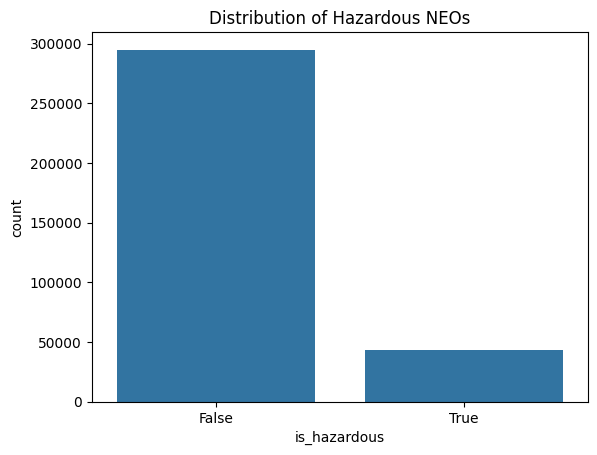

In [ ]:
# distribution of target variable "is_hazardous" in the data

sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of Hazardous NEOs')
plt.show()

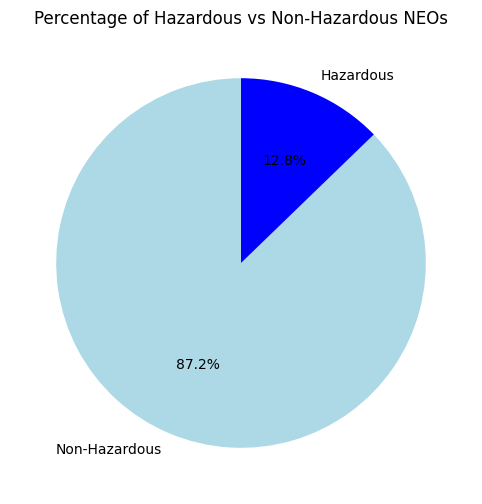

In [ ]:
#The Percentage of Hazardous and Non-Hazardous NEOs
hazardous_percentage = df['is_hazardous'].value_counts(normalize=True) * 100

# Define labels and sizes
labels = ['Non-Hazardous', 'Hazardous']
sizes = hazardous_percentage

# Define colors
colors = ['lightblue', 'blue']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Hazardous vs Non-Hazardous NEOs')

# Show the plot
plt.show()

In [ ]:
# Imbalanced data, far more non-hazardous NEOs than hazardous ones

In [ ]:
print(df['is_hazardous'].value_counts(normalize=True) * 100)

is_hazardous
False    87.236635
True     12.763365
Name: proportion, dtype: float64


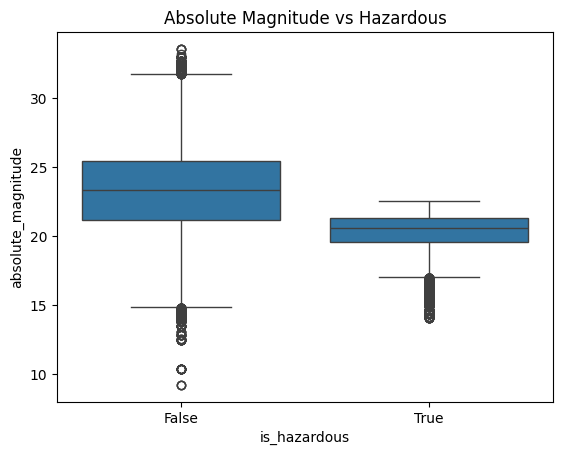

In [ ]:
# relationship between `absolute_magnitude` and `is_hazardous`
sns.boxplot(x='is_hazardous', y='absolute_magnitude', data=df)
plt.title('Absolute Magnitude vs Hazardous')
plt.show()

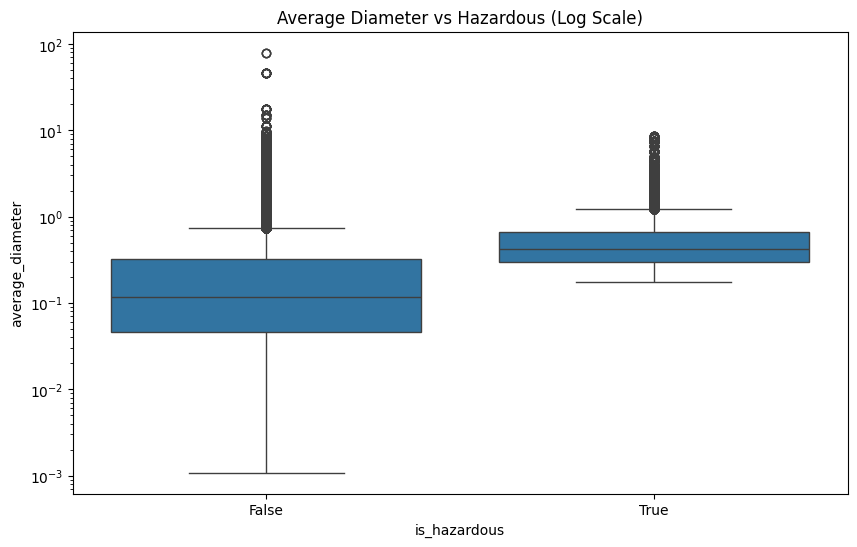

In [ ]:
# relationship between `average_diameter` and `is_hazardous`
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='average_diameter', data=df)
plt.yscale('log')  # Use log scale for the y-axis
plt.title('Average Diameter vs Hazardous (Log Scale)')
plt.show()

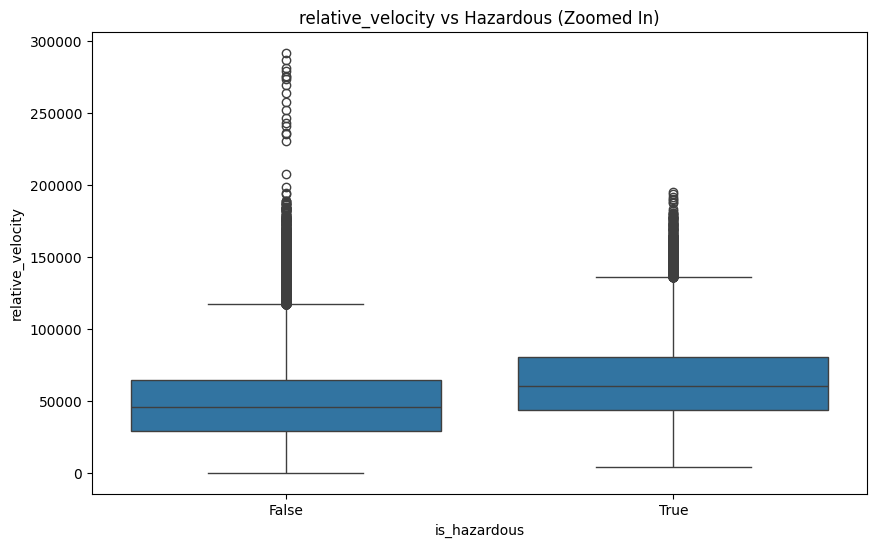

In [ ]:
# relationship between `relative_velocity` and `is_hazardous`
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='relative_velocity', data=df)
plt.title('relative_velocity vs Hazardous (Zoomed In)')
plt.show()

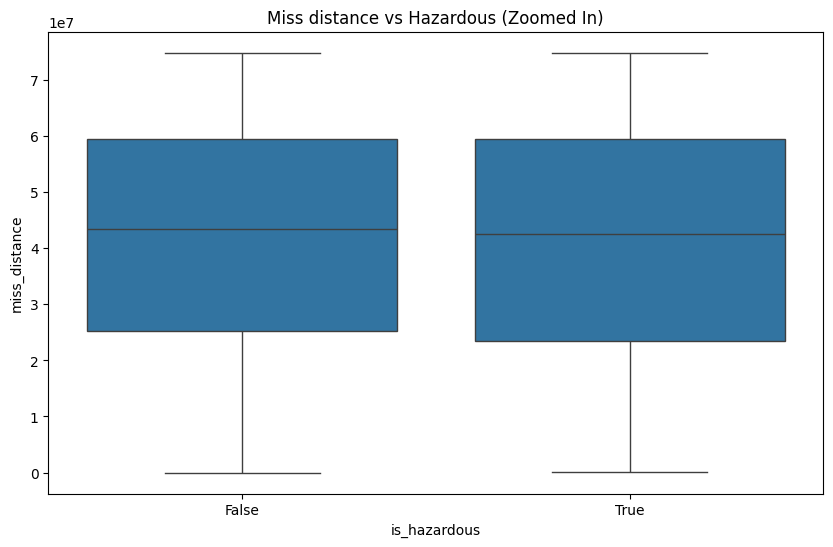

In [ ]:
# relationship between `miss_distance` and `is_hazardous`
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='miss_distance', data=df)
plt.title('Miss distance vs Hazardous (Zoomed In)')
plt.show()


**Step 3 Data Preprocessing**


implanced data - using random oversampling, because non hazerdious NEOs are and hazerdious are not balance. non hazerdious are much smaller 12% of the data

In [ ]:
#check for unique values in categorical columns to Encode Categorical Variables
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [ ]:
# drop the column becuase it has only one value
df = df.drop(columns=['orbiting_body'])

In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'relative_velocity',
       'miss_distance', 'is_hazardous', 'average_diameter'],
      dtype='object')

In [ ]:
# Check the unique values in the 'is_hazardous' column
print("Before Encoding:")
print(df['is_hazardous'].unique())

# Convert True/False to 1/0
df['is_hazardous'] = df['is_hazardous'].astype(int)

# Verify the conversion
print("\nAfter Encoding:")
print(df['is_hazardous'].unique())

Before Encoding:
[False  True]

After Encoding:
[0 1]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

target_column = 'is_hazardous'
# Separate features and target
# Drop non-numeric columns
X = df.drop(columns=['is_hazardous','neo_id','name'])
y = df[target_column]

# Check the original class distribution
print("Original Class Distribution:")
print(y.value_counts(normalize=True) * 100)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balanced class distribution
print("\nBalanced Class Distribution:")
print(y_resampled.value_counts(normalize=True) * 100)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original Class Distribution:
is_hazardous
0    87.236635
1    12.763365
Name: proportion, dtype: float64

Balanced Class Distribution:
is_hazardous
0    50.0
1    50.0
Name: proportion, dtype: float64


**Step 4 Model Training and Evaluation**

**Decision Tree**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing


# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = tree_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9397478051591471
Confusion Matrix:
[[55541  3499]
 [ 3611 55353]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     59040
           1       0.94      0.94      0.94     58964

    accuracy                           0.94    118004
   macro avg       0.94      0.94      0.94    118004
weighted avg       0.94      0.94      0.94    118004



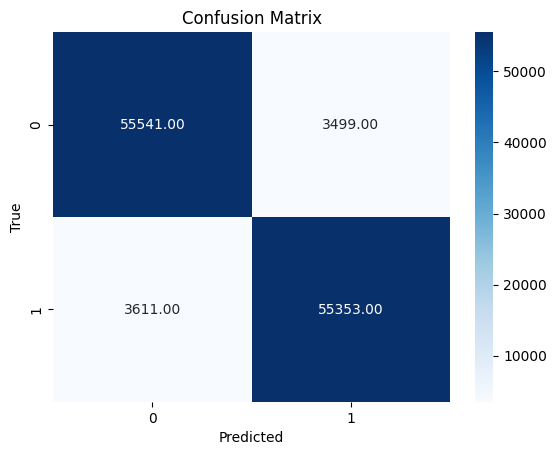

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

#plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<Figure size 3500x1000 with 0 Axes>

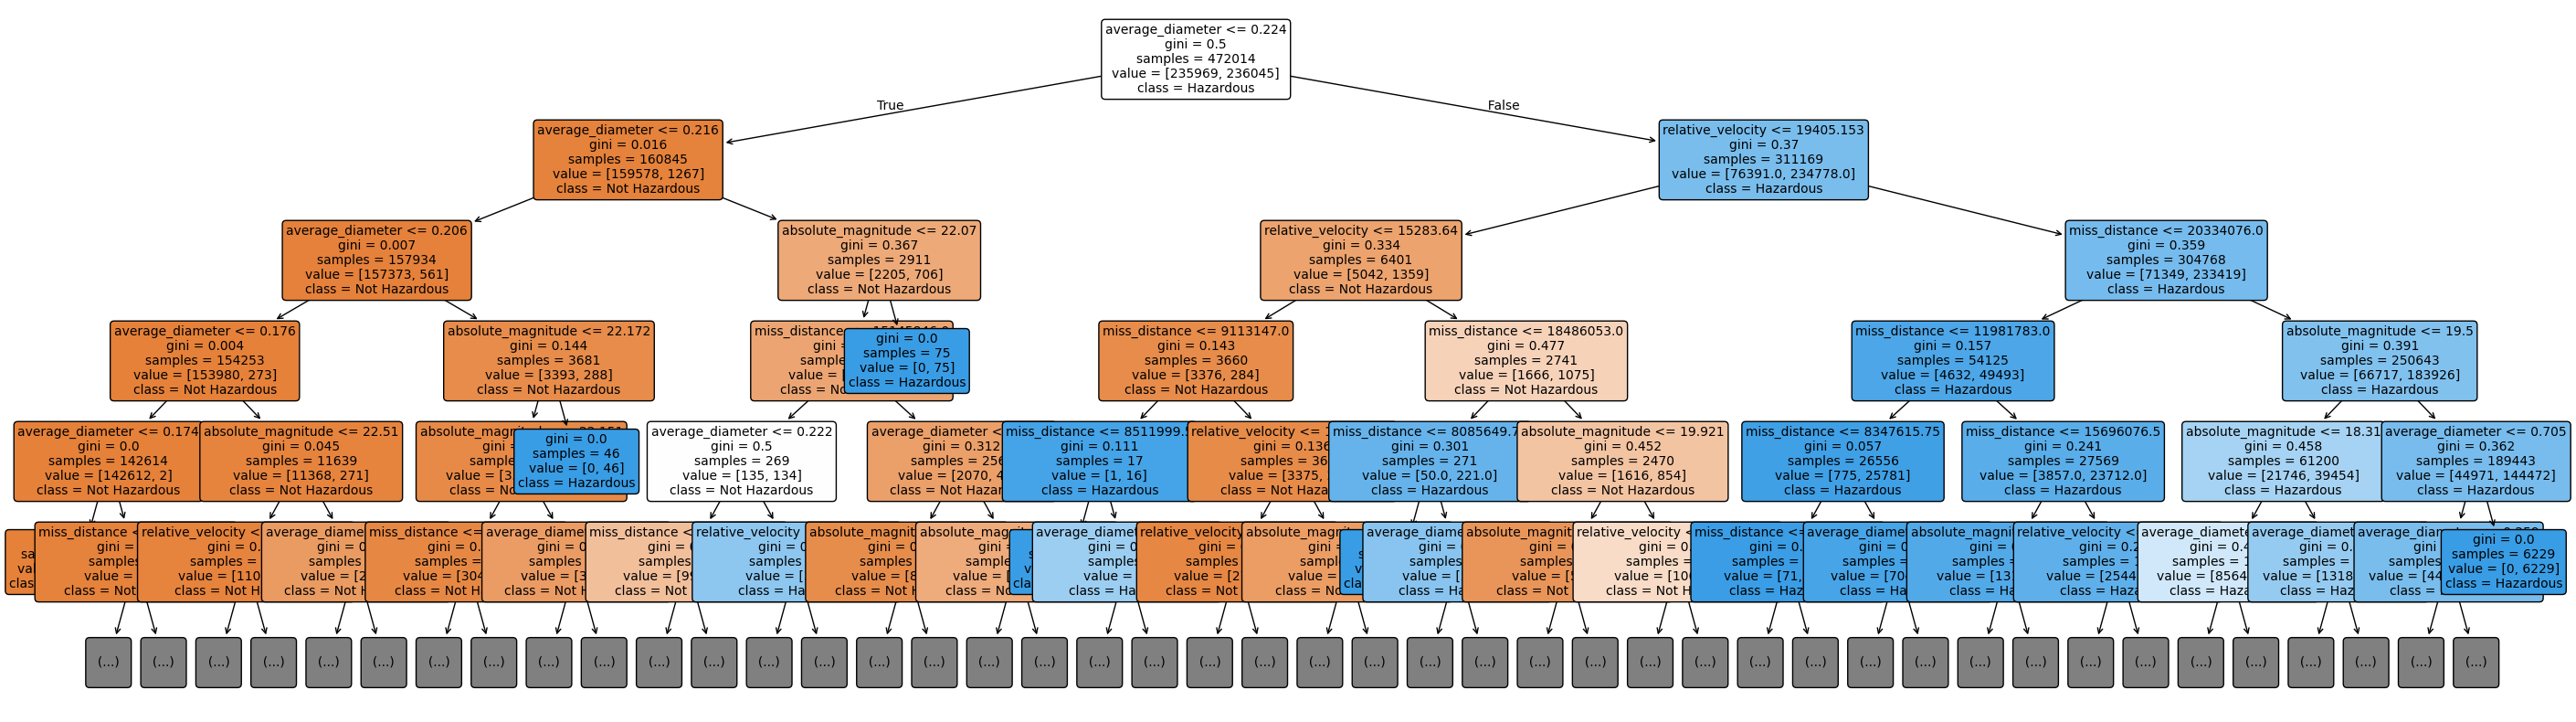

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access the decision tree model
single_tree = tree_model

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access the decision tree model
single_tree = tree_model

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')

# Plot the decision tree
plot_tree(single_tree, feature_names=X_train.columns, class_names=['Not Hazardous', 'Hazardous'], rounded=True, filled=True, fontsize=10, max_depth=5)

# Show the plot
plt.show()
plt.show()


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Use SelectFromModel to select important features
sel = SelectFromModel(tree_model, threshold=0.01)
sel.fit(X_train, y_train)
selected_features = X_train.columns[sel.get_support()]

print("Number of selected features:", len(selected_features))
print("Selected features:", selected_features)

Number of selected features: 4
Selected features: Index(['absolute_magnitude', 'relative_velocity', 'miss_distance',
       'average_diameter'],
      dtype='object')


In [ ]:
#Check the feature importance scores

importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
3    average_diameter    0.646914
0  absolute_magnitude    0.146605
1   relative_velocity    0.115422
2       miss_distance    0.091059


In [ ]:
# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the Decision Tree
tree_model_selected = DecisionTreeClassifier(random_state=42)
tree_model_selected.fit(X_train_selected, y_train)

# Evaluate the retrained model
y_pred = tree_model_selected.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9397478051591471
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     59040
           1       0.94      0.94      0.94     58964

    accuracy                           0.94    118004
   macro avg       0.94      0.94      0.94    118004
weighted avg       0.94      0.94      0.94    118004



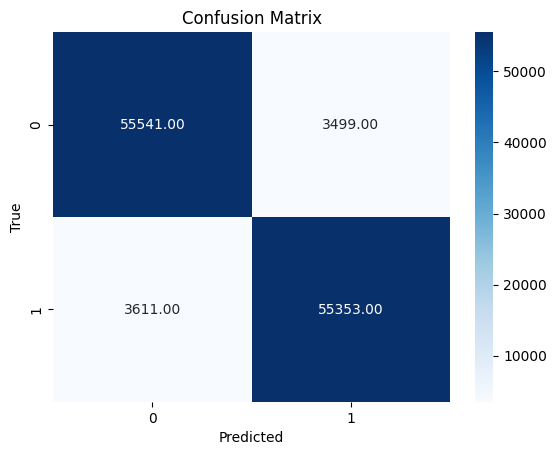

In [ ]:
cm_2 = confusion_matrix(y_test, y_pred)

#plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
# using RFE selection method to select a more balanced set of features.
rfe = RFE(tree_model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# got the same features

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected Features: Index(['absolute_magnitude', 'relative_velocity', 'miss_distance',
       'average_diameter'],
      dtype='object')


**Random Forest Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

target_column = 'is_hazardous'

X = df.drop(columns=['is_hazardous','neo_id','name'])
y = df[target_column]

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Decision Tree model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     59040
           1       0.95      0.95      0.95     58964

    accuracy                           0.95    118004
   macro avg       0.95      0.95      0.95    118004
weighted avg       0.95      0.95      0.95    118004

Confusion Matrix:
[[56091  2949]
 [ 2865 56099]]


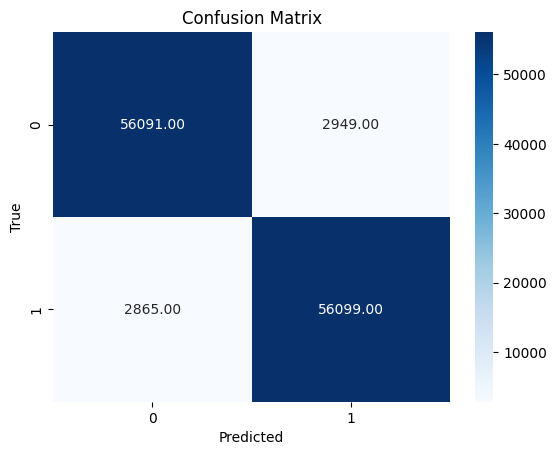

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()